# Preprocessing Multi Axis signal test

In this notebook, we check whether the functions for preprocessing are working as expected for multi axis data

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from caits.visualization import plot_signal
from caits import preprocessing

## Step 2: Initialize dataset

In [2]:
sampling_rate = 1000
duration = 1.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
n_samples = t.shape[0]

# Channel 1: sine wave, no offset
ch1 = np.sin(2 * np.pi * 5 * t)  # 5 Hz

# Channel 2: same sine wave, larger amplitude + offset
ch2 = 10 * np.sin(2 * np.pi * 5 * t)

# Channel 3: padded noise before and after sine
ch3 = np.zeros_like(t)
sine_segment = np.sin(2 * np.pi * 5 * t[int(0.25*n_samples):int(0.75*n_samples)])
ch3[int(0.25*n_samples):int(0.75*n_samples)] = sine_segment

data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(1000, 3)

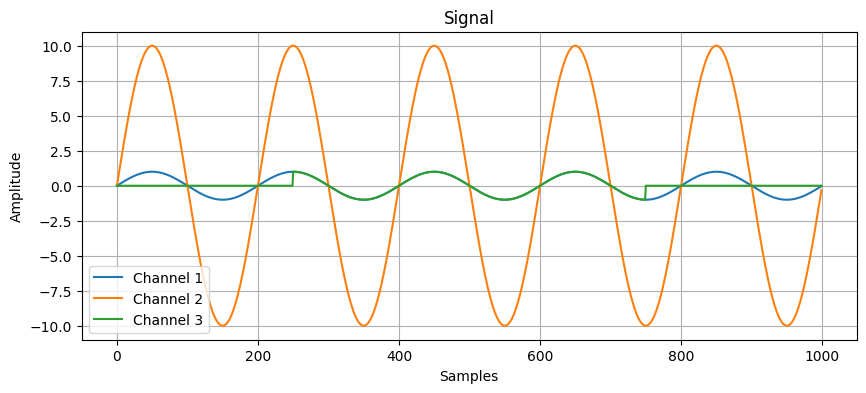

In [3]:
fig = plot_signal(data, sr=sampling_rate)

## Step 2: Normalize the data

In [4]:
normalized_data = preprocessing.normalize_signal(data)
normalized_data.shape

(1000, 3)

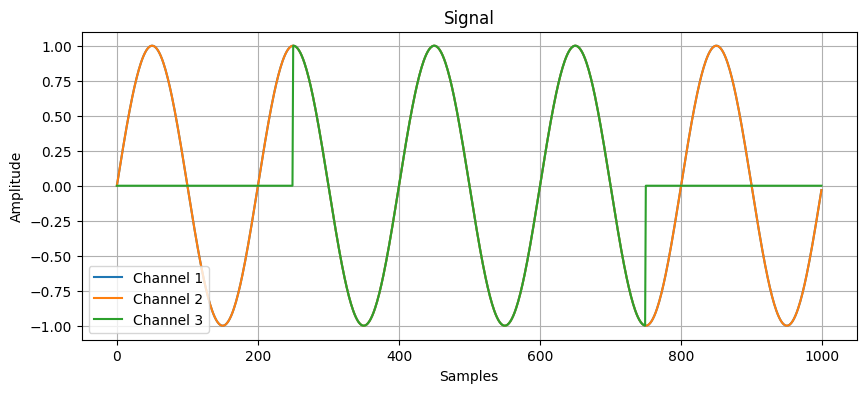

In [5]:
fig = plot_signal(normalized_data, sr=sampling_rate)

## Step 2: Resample data

In [6]:
resampled_data = preprocessing.resample_2d(data, sampling_rate, 50)
resampled_data.shape

(50, 3)

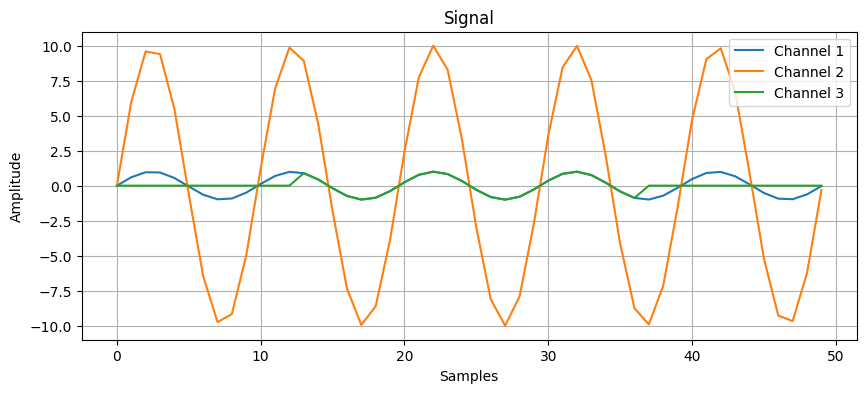

In [7]:
fig = plot_signal(resampled_data, sr=50)

# Real-world data

In [8]:
motion_df = pd.read_csv("data/scratching_eye.csv")

In [9]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [10]:
motion_channels = motion_df.columns.tolist()
motion_channels

['acc_x_axis_g',
 'acc_y_axis_g',
 'acc_z_axis_g',
 'gyr_x_axis_deg/s',
 'gyr_y_axis_deg/s',
 'gyr_z_axis_deg/s']

In [11]:
arr_motion = motion_df.values

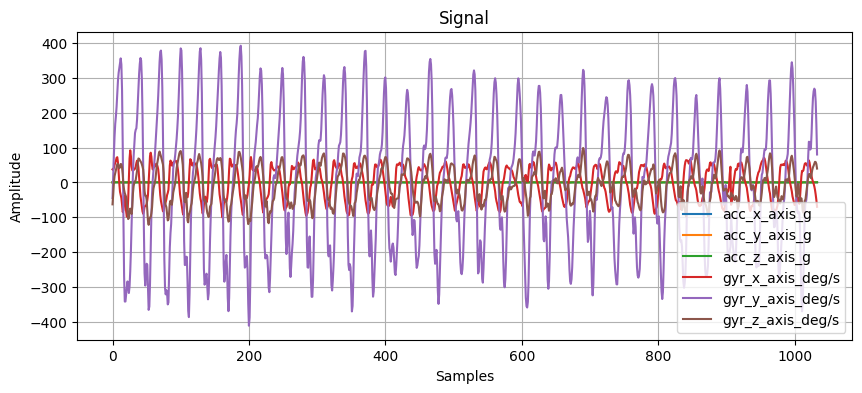

In [12]:
plot_signal(
    arr_motion,
    sr=100,
    channels=motion_channels,
    return_mode=False
)

In [13]:
normalized_arr = preprocessing.normalize_signal(arr_motion)
normalized_data.shape

(1000, 3)

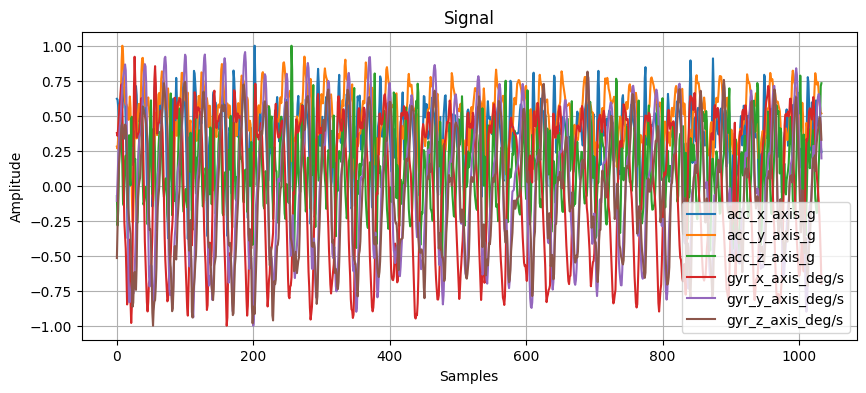

In [14]:
plot_signal(
    normalized_arr,
    sr=100,
    channels=motion_channels,
    return_mode=False
)

In [15]:
resampled_motion = preprocessing.resample_2d(arr_motion, sampling_rate, 50)
resampled_data.shape

(50, 3)

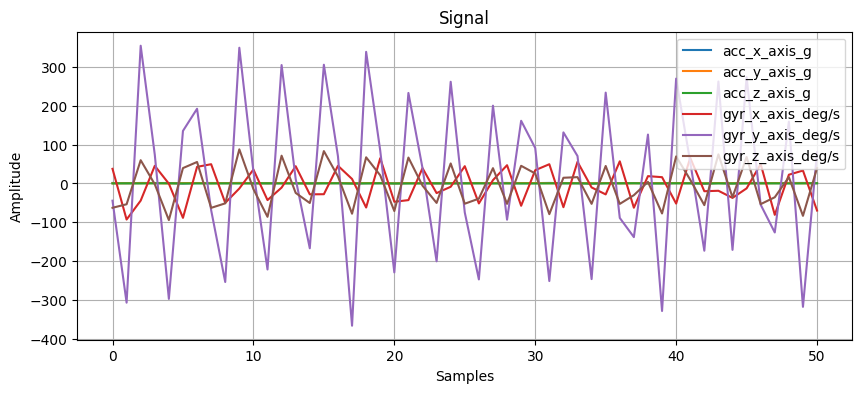

In [16]:
plot_signal(
    resampled_motion,
    sr=50,
    channels=motion_channels,
    return_mode=False
)